In [1]:
from pathlib import Path
import pandas as pd

TEMP_DIR = Path("/beegfs/desy/user/bornemaf/data/syreal_output/GridSearch_Experiment/tmp")
ANALYSIS_CSV_FILE = TEMP_DIR / "finished_jobs_summary_2.csv"
# this file has multi index columns
df = pd.read_csv(ANALYSIS_CSV_FILE, index_col=[0,1], header=[0,1])

print(df)

algorithm                   random                             \
summary                 num_trials  mean_steps std_iterations   
populations niterations                                         
5           5                   15  499.000000       0.000000   
            10                  15  499.000000       0.000000   
            15                  14  476.083333     132.611370   
            20                  15  365.692308     166.728788   
            30                  14  436.333333     138.904625   
...                            ...         ...            ...   
50          40                  15   34.153846      18.524458   
            50                  15   24.846154      10.707422   
            60                  15   22.153846      22.983472   
            80                  15   29.384615      17.684142   
            100                 14   19.666667       9.025192   

algorithm                                            combinatory              \
summary  

In [9]:
# Create a correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# export the correlation matrix to a csv file
corr_matrix.to_csv(TEMP_DIR / "corr_matrix.csv")

algorithm                          random                            \
summary                        num_trials mean_steps std_iterations   
algorithm   summary                                                   
random      num_trials           1.000000  -0.364022      -0.082676   
            mean_steps          -0.364022   1.000000       0.345105   
            std_iterations      -0.082676   0.345105       1.000000   
            mean_time_per_step   0.127135  -0.343824      -0.393665   
            std_time             0.112737  -0.010480      -0.146381   
combinatory num_trials           0.454193   0.024400       0.154844   
            mean_steps          -0.183240   0.710949      -0.057785   
            std_iterations      -0.298418   0.772643       0.125495   
            mean_time_per_step   0.125993  -0.569009      -0.542457   
            std_time             0.036127   0.015526      -0.090312   

algorithm                                                   combinatory  \
s

In [10]:
populations_corr_matrix = pd.DataFrame()

for populations in df.index.get_level_values('populations').unique():
    _df = df.loc[populations]
    # convert _df to a dataframe with a single column
    #print(_df)
    # compute correlation between index values and values in each column
    for col in _df.columns:
        #print(col)
        df_col = pd.DataFrame(_df[col])
        # make index a new column
        df_col['niterations'] = _df.index
        df_col.reset_index(drop=True, inplace=True)
        # rename the column
        df_col.rename(columns={col: 'value'}, inplace=True)
        #print(df_col)
        corr = df_col[col].corr(df_col['niterations'])
        #index_corr_matrix[(populations, col)] = corr
        #print(populations, col, corr)
        populations_corr_matrix.loc[populations, f"{col[0]}_{col[1]}"] = corr

print(populations_corr_matrix)

    random_num_trials  random_mean_steps  random_std_iterations  \
5            0.309366          -0.914117               0.154823   
10           0.727068          -0.852534              -0.394702   
15           0.560026          -0.692983              -0.189030   
20           0.659400          -0.818174              -0.291327   
25           0.601510          -0.674280              -0.539069   
30           0.389219          -0.663784              -0.552610   
35           0.519143          -0.519786              -0.745523   
40           0.039084          -0.626775              -0.834517   
45           0.197981          -0.608669              -0.733054   
50           0.539328          -0.566417              -0.750982   

    random_mean_time_per_step  random_std_time  combinatory_num_trials  \
5                    0.951033        -0.176881                     NaN   
10                   0.634768        -0.462804                0.401340   
15                   0.900208         0.

In [11]:
niterations_corr_matrix = pd.DataFrame()

for niterations in df.index.get_level_values('niterations').unique():
    # select the rows with the current niterations. Which is the second level of the index
    _df = df[df.index.get_level_values('niterations') == niterations]
    # convert _df to a dataframe with a single column
    # print(_df)
    # compute correlation between index values and values in each column
    for col in _df.columns:
        #print(col)
        df_col = pd.DataFrame(_df[col])
        
        # make index a new column
        #df_col['populations'] = _df.index
        
        df_col.reset_index(drop=False, inplace=True)
        #print(df_col)
        # rename the column
        df_col.rename(columns={col: 'value'}, inplace=True)
        #print(df_col)
        corr = df_col[col].corr(df_col['populations'])
        #index_corr_matrix[(populations, col)] = corr
        #print(populations, col, corr)
        niterations_corr_matrix.loc[niterations, f"{col[0]}_{col[1]}"] = corr

print(niterations_corr_matrix)

     random_num_trials  random_mean_steps  random_std_iterations  \
5            -0.395064          -0.542074               0.853489   
10           -0.046524          -0.961590               0.650347   
15            0.494413          -0.883455              -0.363816   
20           -0.298541          -0.874559              -0.773223   
30            0.142134          -0.677101              -0.865860   
40           -0.332950          -0.542155              -0.695551   
50           -0.282314          -0.465590              -0.726168   
60           -0.255883          -0.523357              -0.761703   
80           -0.435194          -0.535481              -0.711097   
100          -0.522233          -0.460275              -0.776167   

     random_mean_time_per_step  random_std_time  combinatory_num_trials  \
5                    -0.157480        -0.460342                0.462168   
10                    0.503368        -0.244470                0.174078   
15                    0.46

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

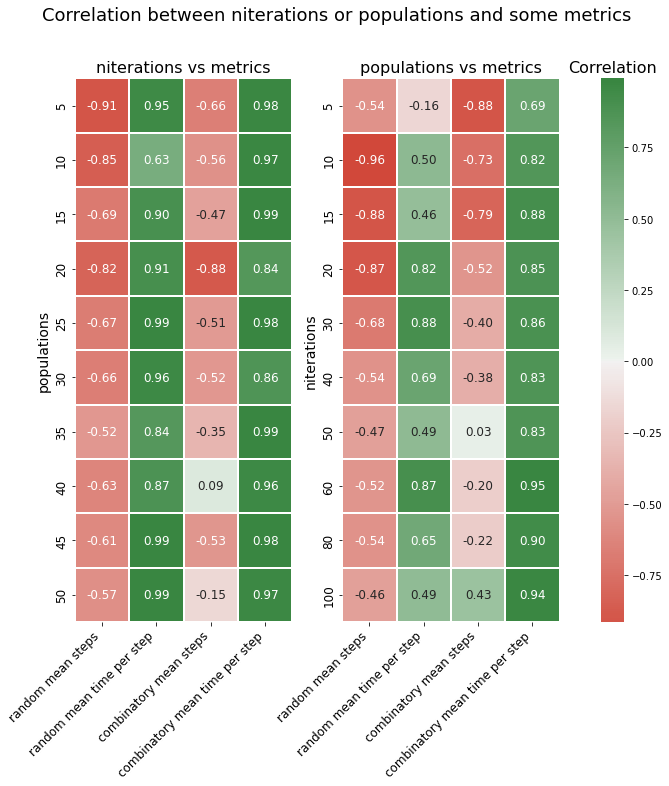

In [19]:
# drop the columns that are not needed
try:
    niterations_corr_matrix.drop(columns=['combinatory_std_iterations', 'random_std_time', 'combinatory_num_trials', 'random_num_trials', 'random_std_iterations', 'combinatory_std_time'], inplace=True)
    # rename the columns
    niterations_corr_matrix.rename(columns={'combinatory_mean_time_per_step': 'combinatory mean time per step', 'combinatory_mean_steps': 'combinatory mean steps', 'random_mean_time_per_step': 'random mean time per step', 'random_mean_steps': 'random mean steps'}, inplace=True)
except:
    pass

try:
    populations_corr_matrix.drop(columns=['combinatory_std_iterations', 'random_std_time', 'combinatory_num_trials', 'random_num_trials', 'random_std_iterations', 'combinatory_std_time'], inplace=True)
    # rename the columns
    populations_corr_matrix.rename(columns={'combinatory_mean_time_per_step': 'combinatory mean time per step', 'combinatory_mean_steps': 'combinatory mean steps', 'random_mean_time_per_step': 'random mean time per step', 'random_mean_steps': 'random mean steps'}, inplace=True)
except:
    pass

# Set up the heatmap figure
fig= plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('white')
fig.patch.set_edgecolor('white')
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.1])

# Define axes
ax = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2])]

# Define color map
cmap = sns.diverging_palette(15, 130, as_cmap=True, center='light')

# Plot the heatmap
sns.heatmap(niterations_corr_matrix, ax=ax[1], cmap=cmap, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar=False, annot_kws={"size": 12})

# Plot the heatmap
sns.heatmap(populations_corr_matrix, ax=ax[0], cmap=cmap, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .8}, cbar_ax=ax[2], annot_kws={"size": 12})
# add title of the colorbar
ax[2].set_title("Correlation", fontsize=16)
ax[1].set_title("populations vs metrics", fontsize=16)
ax[0].set_title("niterations vs metrics", fontsize=16)


# Add title and axis labels
fig.suptitle(fontsize=18, t="Correlation between niterations or populations and some metrics")
# add text under the title
#fig.text(0.5, 0.93, ha='center', fontsize=14, s="For every value, of niterations or populations, the correlation is between the\ncolumn and all values of the opposite index")
ax[1].set_ylabel("niterations", fontsize=14)
ax[0].set_ylabel("populations", fontsize=14)
# increase ticks fontsize
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
# rotate xticks
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')



# Show the plot
plt.show()

In [20]:
# From df, get the best values for niterations and populations. The criteria is the minimum value of the mean time and the most difference between the iterations of random and combinatory
# get the best value for niterations

# make new dataframe with only the mean time and the mean iterations
new_df = pd.DataFrame()
for col in df.columns:
    # check if num_trials bigger than 5
    if 'num_trials' in col:
        if df[col].max() < 5:
            continue
    if 'mean_time_per_step' in col:
        new_df[f"{col[0]}_{col[1]}"] = df[col]
    if 'mean_steps' in col:
        new_df[f"{col[0]}_{col[1]}"] = df[col]

# drop rows with nan values
new_df.dropna(inplace=True)
new_df.reset_index(drop=False, inplace=True)

# compute the difference between the mean iterations of random and combinatory
new_df['diff_mean_steps'] = (new_df['random_mean_steps'] / new_df['combinatory_mean_steps'])
new_df['total_time'] = new_df['random_mean_time_per_step']*new_df['random_mean_steps'] + new_df['combinatory_mean_time_per_step']*new_df['combinatory_mean_steps']
#print(new_df)

# sort by the difference between the mean iterations of random and combinatory and the total time
#new_df.sort_values(by=['diff_mean_steps', 'total_time'], inplace=True, ascending=[True, False], )
new_df.sort_values(by='total_time', inplace=True, ascending=False)

#print(new_df.tail(5))
# export tail to csv
new_df.tail(10).to_csv(TEMP_DIR / 'best_values.csv', index=False)

# export tail to markdown table
with open(TEMP_DIR / 'best_values.md', 'w') as f:
    f.write(new_df.tail(10).to_markdown())

#print(new_df.iloc[-1][["populations", "niterations"]])